In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
df1 = pd.read_csv('../../data_backer/backer_serial_data.tsv',
                  sep='\t', index_col=0, header=0)
df1_raw = pd.read_csv('../../data_backer/backer_serial_data_raw.tsv',
                  sep='\t', index_col=0, header=0)

In [31]:
df1_raw.sum(axis=0)

w50_intraHH    164
w50_interHH     71
w51_intraHH    380
w51_interHH    193
dtype: int64

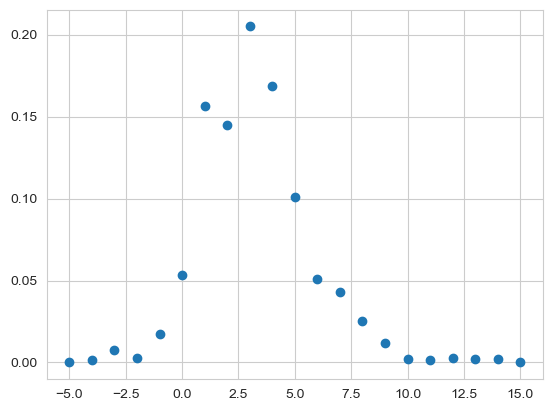

In [16]:
# dumb method

df_dumb = df1.mean(axis=1)
plt.scatter(x = df_dumb.index, y=df_dumb.values)

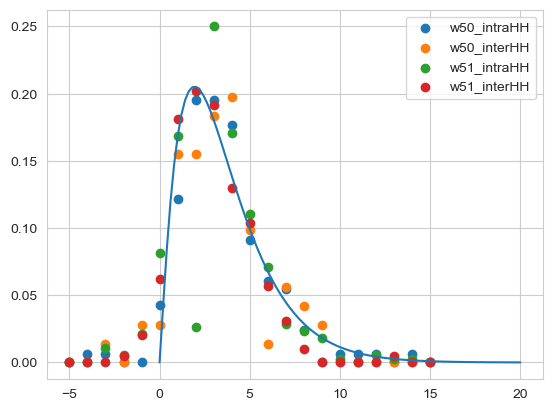

In [39]:
# Let's just use the AdH method...
# shape = 2.14
# rate = 0.59
x = np.linspace(0,20, 100)
adh_gamma = scipy.stats.gamma.pdf(x=x, a=2.14, scale=1/0.59)
plt.plot(x,adh_gamma)
for col in df1.columns:
    plt.scatter(x = df1.index, y=df1[col].values, label=col)
plt.legend()

# Need to justify that ADH curve satisfices...

In [7]:
# xs = np.arange(-50, 150, 1) / 10
# interp1d_kind = 'quadratic'
# for label, set_to_fit in df1.items():
#     x = set_to_fit.index
#     y = set_to_fit.values
#     interp1d_func =


# Cold storage

In [32]:
# infer the parameters for a gamma function, per column
gamma_fits = {}
gamma_fits_2 = {}
weibull_fits = {}
output_labels = ['a','loc','scale']
w_output_labels = ['c','loc','scale']
for label, set_to_fit in df1_raw.items():
        gamma_fits_2[label] = dict(zip(output_labels,scipy.stats.gamma.fit(set_to_fit, method='MLE')))

for label, set_to_fit in df1.items():
    gamma_fits[label] = dict(zip(output_labels,
                                 scipy.stats.gamma.fit(set_to_fit, method='MM')))

    weibull_fits[label] = dict(zip(w_output_labels,
                                   scipy.stats.weibull_min.fit(set_to_fit,
                                                               method='MM')))

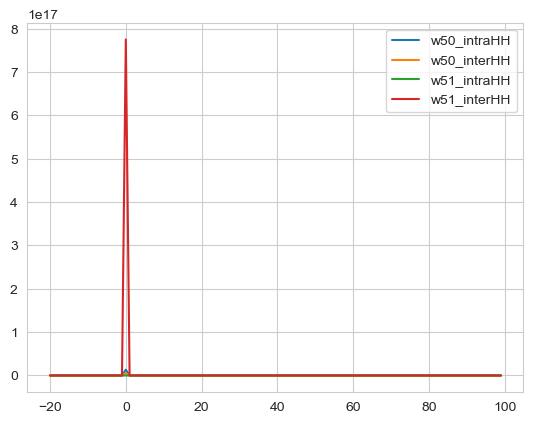

In [33]:
x = range(-20,100)
for k, v in gamma_fits_2.items():
    gamma_plot = scipy.stats.gamma.pdf(x, **v)
    plt.plot(x, gamma_plot, label=k)
plt.legend()


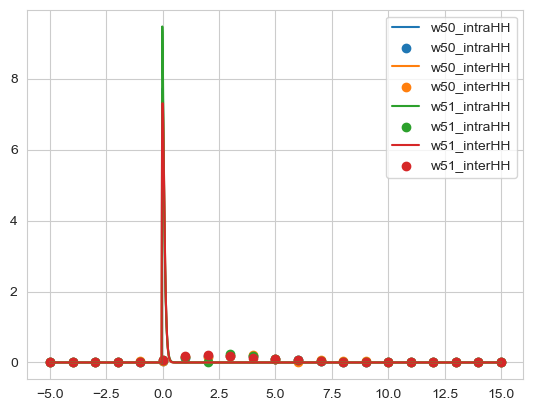

In [13]:
gamma_funcs = {}
# seems correct shape but weird scaling (param A seems logical compared with the AdH paper)
x = np.arange(-500, 1500) / 100
for k, v in weibull_fits.items():
    # x = df1[k].index

    # v = v.copy()
    # v['loc'] = -0.5
    # v['scale'] = 1/0.7
    # gamma_plot = scipy.stats.gamma.pdf(x, **v)
    gamma_plot = scipy.stats.weibull_min.pdf(x, **v)
    gamma_funcs[k] = gamma_plot

    plt.plot(x, gamma_plot, label=k)
    plt.scatter(df1[k].index, df1[k].values, label=k)
plt.legend()
# plt.xlim(-0.1, 0.5)
